In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
# directory=Path('/g/data/er8/users/cd3022/solar_drought/GCCSA/clear_sky_index/2GMEL')
# files = sorted(str(p) for p in directory.rglob("*.nc"))

# ds = xr.open_mfdataset(
#     files,
#     combine='by_coords',
#     engine='h5netcdf',
# )


regions = ['2GMEL']
base_path = Path('/g/data/er8/users/cd3022/solar_drought/GCCSA/clear_sky_index/')

region_darrays = {}

for region in regions:
    file_path = base_path / region
    files = list(file_path.rglob("*.nc"))
    ds_region = xr.open_mfdataset(files, combine='by_coords')
    
    # Assume there's only one data variable in the dataset
    data_var = list(ds_region.data_vars)[0]
    region_darrays[region] = ds_region[data_var]

# Combine into one dataset, with each region as a variable
ds = xr.Dataset(region_darrays)
ds = ds.load()
# Assign Brisbane time
time_utc = pd.to_datetime(ds.time.values)
time_aest = time_utc.tz_localize("UTC").tz_convert("Australia/Brisbane")
time_aest_naive = time_aest.tz_convert("Australia/Brisbane").tz_localize(None)
ds = ds.assign_coords(time=("time", time_aest_naive))

NameError: name 'pd' is not defined

In [3]:
ds = ds.rename({'__xarray_dataarray_variable__':'CSI'})

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: merging cohorts
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


(0.0, 1.5)

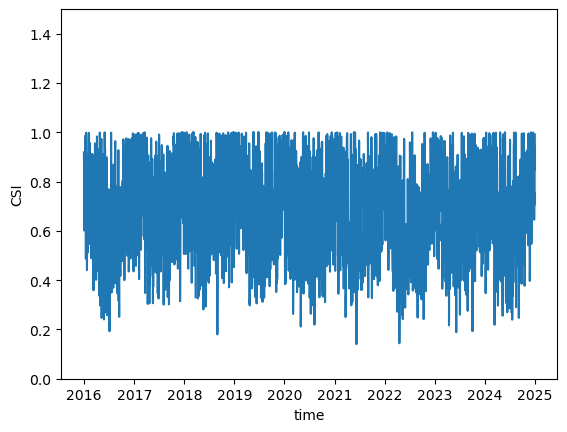

In [8]:
ds.CSI.clip(max=1).resample(time='1D').mean().plot()
plt.ylim(0,1.5)

In [5]:
# import pandas as pd
# month = pd.to_datetime(ds.sel(time='2020-01-01').isel(time=1).time.values.item()).month
# f'{month:02d}'